# Adaptive Metropolis sampler

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

from pypesto.sample.samplers.AdaptiveMetropolis.adaptive_metropolis_sampler import AdaptiveMetropolisSampler

In [13]:
### Elba's toy problem
def p(x):
    return np.log(0.3*multivariate_normal.pdf(x, mean=-1.5, cov=0.1)+0.7*multivariate_normal.pdf(x, mean=2.5, cov=0.2))

sample = np.array([0.])
lower_bounds = np.array([-10])
upper_bounds = np.array([10])
covariance = np.identity(sample.size)
###

settings = {
    'log_posterior_callable': lambda x: p(x),
    'debug': True,
    'covariance': covariance,
    'lower_bounds': lower_bounds,
    'upper_bounds': upper_bounds,
    'decay_constant': 0.5,
    'threshold_sample': 1,
    'regularization_factor': 1e-6,
    'n_samples': 1000,
    'sample': sample,
}



In [14]:
# Setup initial sampling
sampler = AdaptiveMetropolisSampler(settings=settings)
print('First 1000 samples')
chains = sampler.sample()
# Save initial sampling
sampler.save_state('checkpoint.pickle')
print(f"Chain length: {len(sampler.get_state('chain')['samples_log_posterior'])}")
print(f"First sample: {sampler.get_state('chain')['samples_log_posterior'][0]}")
print(f"Last sample:  {sampler.get_state('chain')['samples_log_posterior'][-1]}")

First 1000 samples
Chain length: 1000
First sample: -10.198763148223701
Last sample:  -0.4723723641415639


In [15]:
# Generate 1000 samples with initial sampling
# These 1000 samples will be in addition to the initial samples
# Hence, the chain will contain 2000 samples
print('first a further 1000, for a total of 2000 samples')
chains = sampler.sample(1000)
#sampler.save_state('checkpoint.pickle')
print(f"Chain length: {len(sampler.get_state('chain')['samples_log_posterior'])}")
print(f"First sample: {sampler.get_state('chain')['samples_log_posterior'][0]}")
print(f"Last sample:  {sampler.get_state('chain')['samples_log_posterior'][-1]}")

first a further 1000, for a total of 2000 samples
Chain length: 2000
First sample: -10.198763148223701
Last sample:  -0.4709297307253822


In [16]:
# Generate another 1000 samples with the initial sampling, by reading
# in the saved file. Again, the chain will contain 2000 samples.
sampler.load_state('checkpoint.pickle')
print('Reload the first 1000 samples, find another 1000 samples, for a total of 2000')
chains = sampler.sample(1000)
print(f"Chain length: {len(sampler.get_state('chain')['samples_log_posterior'])}")
print(f"First sample: {sampler.get_state('chain')['samples_log_posterior'][0]}")
print(f"Last sample:  {sampler.get_state('chain')['samples_log_posterior'][-1]}")

Reload the first 1000 samples, find another 1000 samples, for a total of 2000
Chain length: 2000
First sample: -10.198763148223701
Last sample:  -0.527652442597766


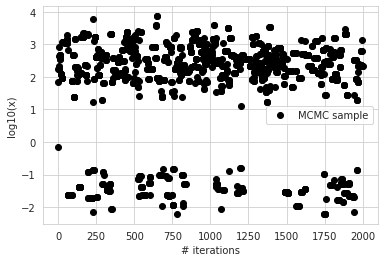

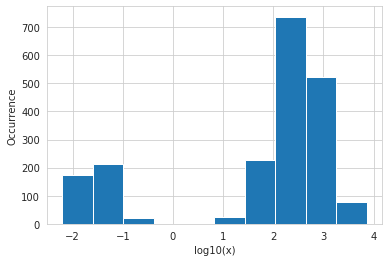

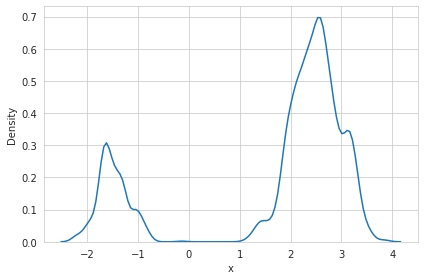

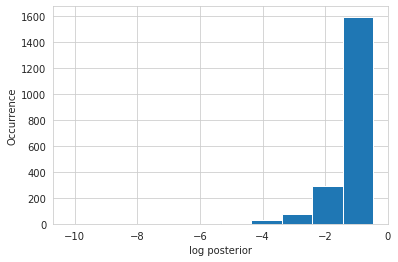

In [17]:
# Elba's toy problem plotting code (slightly modified)
plt.figure()
plt.plot(range(sampler.state.n_samples), chains['samples'][0][0], 'ko', label='MCMC sample')
plt.xlabel('# iterations')
plt.ylabel('log10(x)')
plt.legend()
plt.show()
plt.close()

plt.figure()
plt.hist(chains['samples'][0][0])
plt.xlabel('log10(x)')
plt.ylabel('Occurrence')
plt.show()
plt.close()

plt.figure()
sns.set_style('whitegrid')
sns.kdeplot(chains['samples'][0][0], bw=0.1)
# plt.hist(resultAM['samples'][0])
plt.xlabel('x')
plt.ylabel('Density')
plt.tight_layout()
plt.show()
plt.close()

plt.figure()
plt.hist(chains['samples_log_posterior'][0])
plt.xlabel('log posterior')
plt.ylabel('Occurrence')
plt.show()
plt.close()

In [18]:
from scipy.stats import kstest, norm

def logpdf(x):
    return norm.logpdf(x)

sample = np.array([0])
lower_bounds = np.array([-10])
upper_bounds = np.array([10])
covariance = np.identity(sample.size)

# could change n_samples to chain_length to avoid confusion
settings = {
    'n_samples': 1000,
    #Adaptive Metropolis settings
    'debug': False,
    'sample': sample,
    'covariance': covariance,
    'lower_bounds': lower_bounds,
    'upper_bounds': upper_bounds,
    'decay_constant': 0.51,
    'threshold_sample': 1,
    'regularization_factor': 1e-6,
    'log_posterior_callable': logpdf,
}

samplerAM = AdaptiveMetropolisSampler(settings)
resultAM = samplerAM.sample()
kstestAM = kstest(resultAM['samples'][0][0], 'norm')
print('Kolmogorov-Smirnov test for the Adaptive Metropolis sampler.\nStatistic: '
        f'{kstestAM[0]:.5f}'
      '\np-value: '
      f'{kstestAM[1]:.15f}')

Kolmogorov-Smirnov test for the Adaptive Metropolis sampler.
Statistic: 0.06631
p-value: 0.000288131954357
